In [1]:
from railroad import load_graph, save_graph, plot_node_graph, test_road_graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import Point, LineString
from geopy.distance import geodesic

from utils import print_graph_info, osmnx_to_geopandas

In [2]:
stations_df = pd.read_csv('../data/6_stations_to_years_with_coords.csv')
display(stations_df)

,intersection_id,year,comment,coord_x,coord_y
0,11142383860,2025,NaN,-21.937045,64.115172
1,12339218091,2025,NaN,-21.931079,64.123404
2,323282788,2025,NaN,-21.928775,64.126469
3,1064270444,2025,NaN,-21.931328,64.138245
4,59980770,2025,NaN,-21.936397,64.138822
5,26471951,2025,NaN,-21.947765,64.142722
6,1225420655,2025,NaN,-21.935516,64.147771
7,12339218093,2025,NaN,-21.914030,64.143340
8,34512506,2025,NaN,-21.904019,64.142270
9,5902567606,2025,NaN,-21.883583,64.140061


In [3]:
G = load_graph('../data/reykjavik_road_graph_with_bridges.json')

In [4]:
G.nodes[1848219055]

{'street_count': 3, 'geometry': <POINT (-21.81 64.086)>}

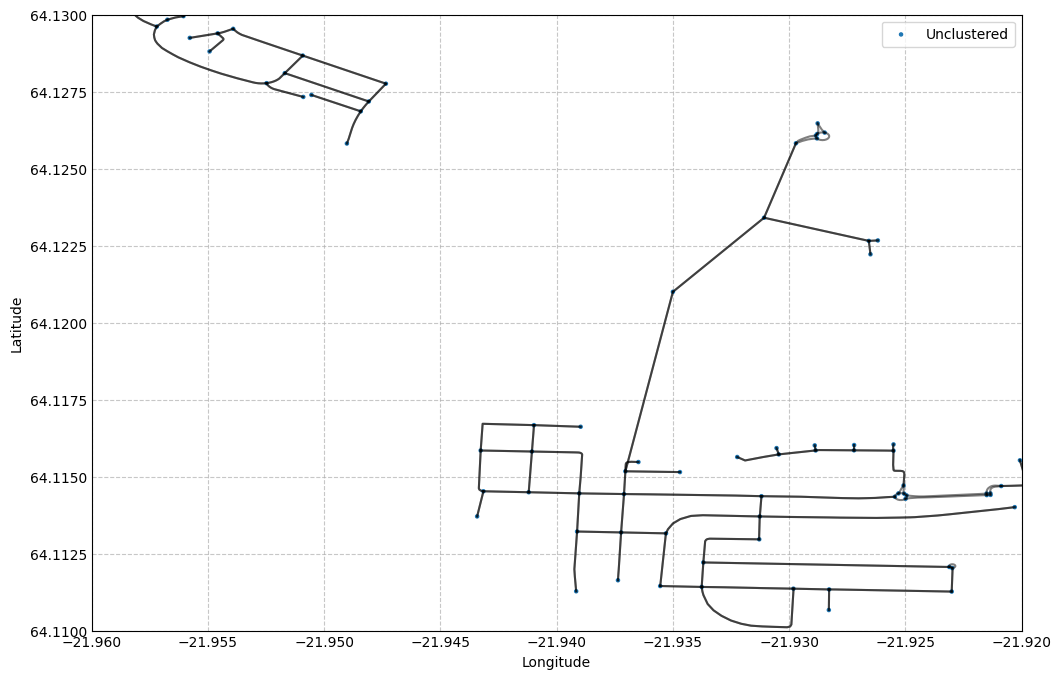

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='Longitude', ylabel='Latitude'>)

In [5]:
plot_node_graph(G, xlim=(-21.96, -21.92), ylim=(64.11, 64.13),
                show_node_ids=False, show_nodes_labels=False, node_size=5, add_map=False)

In [6]:
routes_df = pd.read_csv('../data/simple_routes.csv')
print(routes_df.columns)
display(routes_df)

Index(['from_id', 'to_id'], dtype='object')


,from_id,to_id
0,1848219055,602729079
1,602729079,111465687
2,111465687,2320771865
3,2320771865,2328470640
4,2328470640,470330027
5,470330027,534441279
6,534441279,11142383860
7,11142383860,12339218091
8,12339218091,323282788
9,323282788,1064270444


In [7]:
road_paths = []
for i, row in routes_df.iterrows():
    print(f'{row}')
    source = row['from_id']
    target = row['to_id']
    print(f'Finding shortest path between nodes {source} and {target}')
    # Find the shortest path between nodes 11142383860 and 12339218091
    shortest_path = nx.shortest_path(
        G, source=source, target=target, weight='length')
    print(shortest_path)
    road_paths.append(shortest_path)

from_id    1848219055
to_id       602729079
Name: 0, dtype: int64
Finding shortest path between nodes 1848219055 and 602729079
[1848219055, 2377573222, 2376559462, 6275519667, 464514835, 255374230, 6275529020, 255374228, 436642539, 464514874, 6275519676, 8757632198, 6275509789, 6275567390, 253237967, 618283572, 6275560955, 253237969, 6275577338, 253238141, 6277124994, 253237639, 6277137416, 305402675, 305402676, 305402682, 10789596687, 2367902957, 253237941, 6277250174, 253486665, 253486666, 253486667, 618283380, 5709609640, 253486538, 1086047155, 1086046995, 602729079]
from_id    602729079
to_id      111465687
Name: 1, dtype: int64
Finding shortest path between nodes 602729079 and 111465687
[602729079, 602729091, 602729115, 444015549, 602729107, 602729133, 602729043, 602729028, 602729034, 602729030, 602728980, 602728960, 2366342708, 2366342711, 2320813182, 2323580748, 602728948, 2320813175, 5023088936, 538191116, 5023088950, 444005302, 5023088942, 111465687]
from_id     111465687
to_i

In [8]:
road_graph = nx.Graph()
for path in road_paths:
    from_id = path[0]
    to_id = path[-1]
    from_year = stations_df[stations_df['intersection_id']
                            == from_id]['year'].values[0]
    try:
        to_year = stations_df[stations_df['intersection_id']
                              == to_id]['year'].values[0]
    except IndexError:
        print(f'No year found for station {to_id}')
        raise
    year = max(from_year, to_year)
    for node in path:
        if node not in road_graph:
            data = dict(G.nodes[node])
            if 'geometry' not in data:
                raise ValueError(f'Node {node} does not have geometry')
            if node == from_id:
                data['year'] = from_year
                data['is_station'] = True
            elif node == to_id:
                data['year'] = to_year
                data['is_station'] = True
            else:
                data['year'] = year
            road_graph.add_node(node, **data)
    for i in range(1, len(path)):
        edge_ids = (path[i-1], path[i])
        segment_year = road_graph.edges[edge_ids]['year'] if edge_ids in road_graph.edges and road_graph.edges[edge_ids]['year'] < year else year

        original_graph_edge = G.get_edge_data(path[i-1], path[i], 0)
        data = {'year': segment_year,
                'name': original_graph_edge.get('name', 'unknown'),
                'length': original_graph_edge['length'],
                'geometry': original_graph_edge['geometry'],
                'origin_node': path[i-1]
                }
        check_id = 470330027
        if path[i] == check_id or path[i-1] == check_id:
            print(f'Adding edge {path[i-1]} -> {path[i]}')
            print(data)
        road_graph.add_edge(path[i-1], path[i], **data)

Adding edge 470330019 -> 470330027
{'year': 2025, 'name': 'Borgartorg', 'length': 0.03938533629833767, 'geometry': <LINESTRING (-21.909 64.111, -21.909 64.111, -21.909 64.111, -21.909 64.111,...>, 'origin_node': 470330019}
Adding edge 470330027 -> 384966546
{'year': 2025, 'name': 'Borgartorg', 'length': 0.00263811905258413, 'geometry': <LINESTRING (-21.909 64.111, -21.909 64.111)>, 'origin_node': 470330027}
Adding edge 470330019 -> 470330027
{'year': 2025, 'name': 'Borgartorg', 'length': 0.03938533629833767, 'geometry': <LINESTRING (-21.909 64.111, -21.909 64.111, -21.909 64.111, -21.909 64.111,...>, 'origin_node': 470330019}
Adding edge 470330027 -> 384966546
{'year': 2025, 'name': 'Borgartorg', 'length': 0.00263811905258413, 'geometry': <LINESTRING (-21.909 64.111, -21.909 64.111)>, 'origin_node': 470330027}


In [9]:
for id_in, id_out, data in road_graph.edges(data=True):
    origin_id = data['origin_node']
    assert origin_id in (id_in, id_out)
    if not np.all(np.equal(road_graph.nodes[origin_id]['geometry'].coords, data['geometry'].coords[0])):
        print(
            f"{np.equal(road_graph.nodes[origin_id]['geometry'].coords , data['geometry'].coords[0]) = }")
        print(
            f"{road_graph.nodes[origin_id]['geometry'].coords[0]} != {data['geometry'].coords[0]}")

In [10]:
for node_from, node_to, data in road_graph.edges(data=True):
    if isinstance(data['name'], list):
        data['name'] = '-'.join(filter(None, data['name']))

In [11]:
road_graph.edges[384966546, 470330027]

{'year': 2025,
 'name': 'Borgartorg',
 'length': 0.00263811905258413,
 'geometry': <LINESTRING (-21.909 64.111, -21.909 64.111)>,
 'origin_node': 470330027}

In [12]:
road_graph.edges[470330027, 470330019]

{'year': 2025,
 'name': 'Borgartorg',
 'length': 0.03938533629833767,
 'geometry': <LINESTRING (-21.909 64.111, -21.909 64.111, -21.909 64.111, -21.909 64.111,...>,
 'origin_node': 470330019}

In [13]:
print_graph_info(road_graph)

Undirected has 631 nodes and 638 edges
+----------------------+
Nodes
+----------------------+
*** Node: 1848219055 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.81 64.086)>, 'year': 2025, 'is_station': True}
*** Node: 2377573222 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.81 64.086)>, 'year': 2025}
*** Node: 2376559462 ***
  Data: {'street_count': 4, 'geometry': <POINT (-21.811 64.087)>, 'year': 2025}
*** Node: 6275519667 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.812 64.087)>, 'year': 2025}
*** Node: 464514835 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.812 64.087)>, 'year': 2025}
*** Node: 255374230 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.812 64.087)>, 'year': 2025}
+----------------------+
Edges
+----------------------+
*** Edge: 1848219055 -> 2377573222 ***
  Data: {'year': 2025, 'name': 'Elliðahvammsvegur', 'length': 0.06590414747782208, 'geometry': <LINESTRING (-21.81 64.086, -21.81 64.086, -21.81 64.086, -21.81 64.0

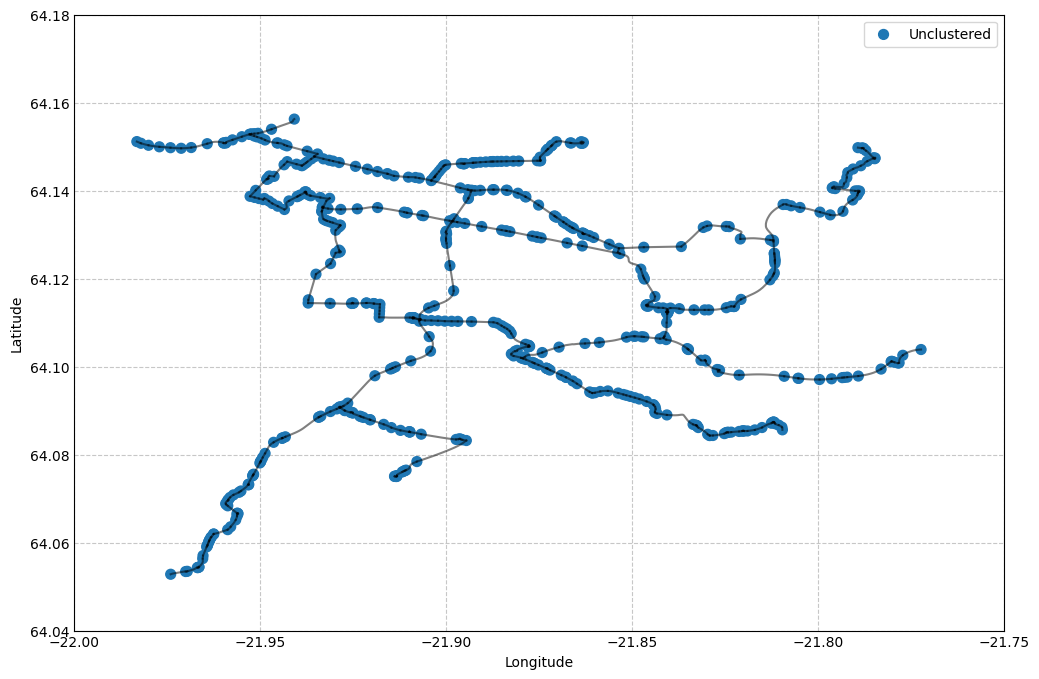

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='Longitude', ylabel='Latitude'>)

In [14]:
plot_node_graph(road_graph, xlim=(-22, -21.75),
                ylim=(64.04, 64.18), add_map=False)

In [15]:
nodes_gdf, edges_gdf = osmnx_to_geopandas(road_graph)
edges_gdf.to_file("../data/simple_railroads.geojson", driver="GeoJSON")
nodes_gdf.to_file("../data/simple_railroads_nodes.geojson", driver="GeoJSON")

In [16]:
for id_in, id_out, data in road_graph.edges(data=True):
    line = data['geometry']
    from_point = road_graph.nodes[id_in]['geometry']
    to_point = road_graph.nodes[id_out]['geometry']

    # Define line_start and line_end for clarity and reuse
    line_start = Point(line.coords[0])
    line_end = Point(line.coords[-1])

    distance_between_stations = geodesic(
        (from_point.x, from_point.y), (to_point.x, to_point.y)).meters
    distance_in_start = geodesic(
        (line_start.x, line_start.y), (from_point.x, from_point.y)).meters
    distance_in_end = geodesic(
        (line_end.x, line_end.y), (from_point.x, from_point.y)).meters
    distance_out_start = geodesic(
        (line_start.x, line_start.y), (to_point.x, to_point.y)).meters
    distance_out_end = geodesic(
        (line_end.x, line_end.y), (to_point.x, to_point.y)).meters

    if distance_in_start == 0 and distance_out_end == 0:
        # Edge is correct
        continue
    elif distance_in_end == 0 and distance_out_start == 0:
        # Edge is inverted but correct
        continue
    else:
        print('Edge is incorrect')
        print(f'Edge {id_in} -> {id_out}')
        print(f'{from_point.x, from_point.y = }')
        print(f'{to_point.x, to_point.y = }')
        print(f'{line_start.x, line_start.y = }')
        print(f'{line_end.x, line_end.y = }')
        print(f'Distance between stations: {distance_between_stations:.2f} m')
        print(f'Distance from in to start: {distance_in_start:.2f} m')
        print(f'Distance from in to end: {distance_in_end:.2f} m')
        print(f'Distance from out to start: {distance_out_start:.2f} m')
        print(f'Distance from out to end: {distance_out_end:.2f} m')

        if distance_in_start < 1 and distance_out_end < 1:
            print('Fixing edge geometry: updating start and end points to match nodes.')
            data['geometry'] = LineString(
                [(from_point.x, from_point.y), (to_point.x, to_point.y)])
        elif distance_in_end < 1 and distance_out_start < 1:
            print(
                'Fixing edge geometry: updating inverted start and end points to match nodes.')
            data['geometry'] = LineString(
                [(to_point.x, to_point.y), (from_point.x, from_point.y)])
        else:
            raise ValueError(
                f'Edge {id_in} -> {id_out} has discrepancies above 1 meter and cannot be fixed.')

In [17]:
test_road_graph(road_graph)

In [18]:
save_graph(road_graph, '../data/simple_railroads.json')